In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.models import Model, Sequential

import os, shutil 
from os import listdir
from os.path import isfile, join

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

import random

In [2]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

In [3]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))),
model.add(MaxPool2D(2,2)),
model.add(Flatten()),
model.add(Dense(100,activation='relu')),
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1593 - accuracy: 0.9523
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0550 - accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0091 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0065 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 29s 15m

# Transfer Learning

# Data preparation****

In [9]:
batch_size = 32
target_size = (224,224)
input_shape = (224, 224, 3)

In [10]:
#Fetching train data and validation data and processing the data
train_datagen = ImageDataGenerator(rescale = 1.00 / 255.0)
val_datagen = ImageDataGenerator(rescale = 1.00 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1.00 / 255.0)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Aalap.LIPI\OneDrive\Desktop\New folder\Fruit and Vegetable dataset\train",
    target_size = target_size,
    batch_size = batch_size

)

validation_generator = val_datagen.flow_from_directory(
    r"C:\Users\Aalap.LIPI\OneDrive\Desktop\New folder\Fruit and Vegetable dataset\validation",
    target_size = target_size,
    batch_size = batch_size
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Aalap.LIPI\OneDrive\Desktop\New folder\Fruit and Vegetable dataset\test",
    target_size = target_size,
    batch_size = batch_size
)

Found 412 images belonging to 5 classes.
Found 49 images belonging to 5 classes.
Found 49 images belonging to 5 classes.


In [11]:
classes_list = ['apple', 'banana', 'beetroot', 'cabbage', 'capsicum']

In [17]:
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
model_vgg16.trainable = False
model_vgg19.trainable = False
model_resnet.trainable = False

58900480/58889256 [==============================] - 438s 7us/step


# VGG16

In [18]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
# add new classifier layers
flat1 = model_vgg16.layers[-1].output
# flat1 = Flat(flat1)
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
output = layers.Dense(5, activation='softmax')(class1)
# define new model
model = Model(inputs=model_vgg16.inputs, outputs=output)
model.compile(
  loss = "categorical_crossentropy",
  optimizer="adam",
  metrics = ["acc"]
)
# summarize
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [21]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [22]:
#Training the model with train data and judging this training with validation data
history1 = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 25,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

Epoch 1/25
13/13 [==============================] - 110s 8s/step - loss: 1.4479 - acc: 0.4053 - val_loss: 0.8088 - val_acc: 0.7959
Epoch 2/25
13/13 [==============================] - 106s 8s/step - loss: 0.8472 - acc: 0.7112 - val_loss: 0.3882 - val_acc: 0.8980
Epoch 3/25
13/13 [==============================] - 105s 8s/step - loss: 0.4433 - acc: 0.8568 - val_loss: 0.2203 - val_acc: 0.9184
Epoch 4/25
13/13 [==============================] - 105s 8s/step - loss: 0.2658 - acc: 0.9078 - val_loss: 0.1780 - val_acc: 0.9184
Epoch 5/25
13/13 [==============================] - 115s 9s/step - loss: 0.1775 - acc: 0.9296 - val_loss: 0.2708 - val_acc: 0.8980
Epoch 6/25
13/13 [==============================] - 115s 9s/step - loss: 0.1897 - acc: 0.9248 - val_loss: 0.2291 - val_acc: 0.8980
Epoch 7/25
13/13 [==============================] - 110s 8s/step - loss: 0.1082 - acc: 0.9709 - val_loss: 0.1899 - val_acc: 0.9388
Epoch 8/25
13/13 [==============================] - 103s 8s/step - loss: 0.1037 - a

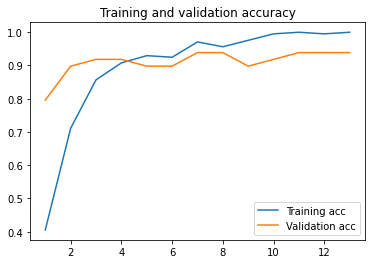

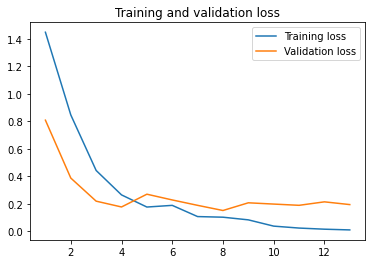

In [23]:
# Plot the train results
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
test_preds = model.predict(test_generator)
test_pred_labels = np.argmax(test_preds, axis=1)
cm = confusion_matrix(test_generator.classes, test_pred_labels)
cm

array([[5, 0, 2, 0, 3],
       [0, 3, 1, 3, 2],
       [1, 2, 4, 2, 1],
       [3, 2, 1, 2, 2],
       [2, 1, 2, 3, 2]], dtype=int64)

In [25]:
def plot_confusion_matrix(cm,
                      classes, 
                      normalized=False, 
                      title=None, 
                      cmap=plt.cm.Blues,
                      size=(16,12)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

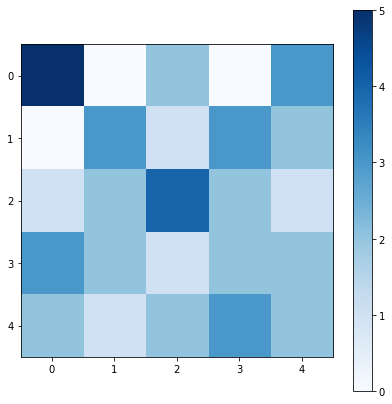

In [26]:
plot_confusion_matrix(cm,
                      classes_list, 
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(7, 7))

In [27]:
result = model.evaluate(test_generator)

2/2 [==============================] - 12s 4s/step - loss: 0.1954 - acc: 0.9388


# VGG19

In [ ]:
model_vgg19.summary()

In [ ]:
# add new classifier layers
flat1 = model_vgg19.layers[-1].output
# flat1 = Flat(flat1)
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
output = layers.Dense(5, activation='softmax')(class1)
# define new model
model = Model(inputs=model_vgg19.inputs, outputs=output)
model.compile(
  loss = "categorical_crossentropy",
  optimizer="adam",
  metrics = ["acc"]
)
# summarize
model.summary()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
#Training the model with train data and judging this training with validation data
history2 = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 25,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

In [ ]:
# Plot the train results
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_preds = model.predict(test_generator)
test_pred_labels = np.argmax(test_preds, axis=1)
cm = confusion_matrix(test_generator.classes, test_pred_labels)
cm

In [ ]:
def plot_confusion_matrix(cm,
                      classes, 
                      normalized=False, 
                      title=None, 
                      cmap=plt.cm.Blues,
                      size=(16,12)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

In [ ]:
plot_confusion_matrix(cm,
                      classes_list, 
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(7, 7))

In [ ]:
result = model.evaluate(test_generator)

# ResNet50 

In [ ]:
model_resnet.summary()

In [ ]:
# add new classifier layers
flat1 = model_resnet.layers[-1].output
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
output = layers.Dense(5, activation='softmax')(class1)
# define new model
model = Model(inputs=model_resnet.inputs, outputs=output)
model.compile(
  loss = "categorical_crossentropy",
  optimizer="adam",
  metrics = ["acc"]
)
# summarize
model.summary()

In [ ]:
#Training the model with train data and judging this training with validation data
history3 = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 20,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

In [ ]:
# Plot the train results
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_preds = model.predict(test_generator)
test_pred_labels = np.argmax(test_preds, axis=1)
cm = confusion_matrix(test_generator.classes, test_pred_labels)
cm

In [ ]:
plot_confusion_matrix(cm,
                      classes_list, 
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(7, 7))

In [ ]:
result = model.evaluate(test_generator)